In [70]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt


In [71]:
df = pd.read_csv (r'C:\Users\hknifton\Downloads\master.csv')

colname = df.columns[9]
print (colname)

#df.rename(columns={"gdp_for_year ($) ": "gdp_for_year"})
df

 gdp_for_year ($) 


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


In [72]:
df2 = df.groupby(['age']).mean()
df2
#suicide is most prominent in 75+ followed by 55 - 74

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
age,,,,,,
15-24 years,2001.275312,174.179664,1.861902e+06,8.947154,0.776601,16876.57346
25-34 years,2001.275312,242.118053,1.817773e+06,12.186885,0.776601,16876.57346
35-54 years,2001.275312,528.250969,3.096917e+06,14.947441,0.776601,16876.57346
5-14 years,2001.173102,11.337093,1.821842e+06,0.620041,0.776601,16815.56833
55-74 years,2001.275312,357.269065,1.896434e+06,16.155579,0.776601,16876.57346
75+ years,2001.275312,140.697544,5.737357e+05,23.955409,0.776601,16876.57346


In [73]:
df3 = df.groupby(['country']).mean()
df3


df3.sort_values('suicides_no')
#highest is russia, US and Japan, lowest is those small ones

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
country,,,,,,
Saint Kitts and Nevis,1991.000000,0.000000,3.258333e+03,0.000000,NaN,5525.000000
Dominica,1985.000000,0.000000,5.533333e+03,0.000000,NaN,1485.000000
Antigua and Barbuda,1999.481481,0.033951,6.142679e+03,0.552901,0.781667,10448.185185
San Marino,2001.333333,0.111111,2.189583e+03,4.045000,NaN,53663.666667
Grenada,2001.793548,0.122581,7.571890e+03,2.132258,0.741600,6209.406452
...,...,...,...,...,...,...
Germany,2002.500000,933.532051,6.489986e+06,15.559904,0.881778,35164.230769
Ukraine,2000.571429,952.232143,3.828777e+06,26.582321,0.713500,1867.535714
Japan,2000.000000,2169.091398,9.895228e+06,21.573199,0.861300,36397.548387


<AxesSubplot:xlabel='population', ylabel='suicides_no'>

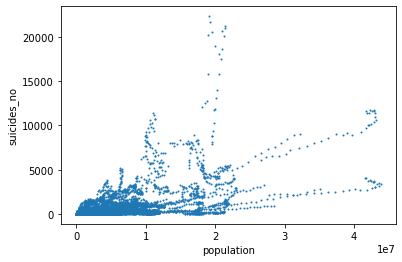

In [74]:
df.plot.scatter(x = 'population', y = 'suicides_no',s=1)
#there is some positive correlation between population and suicides

<AxesSubplot:xlabel='gdp_per_capita ($)', ylabel='suicides_no'>

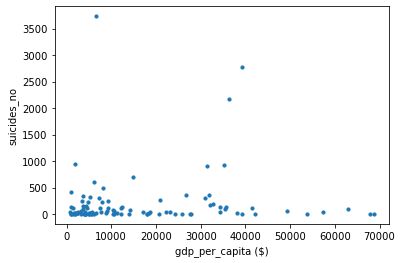

In [75]:
df3.plot.scatter(x = 5, y = 'suicides_no',s=10)
#gdp does not appear to have an effect on suicides

<AxesSubplot:xlabel='year'>

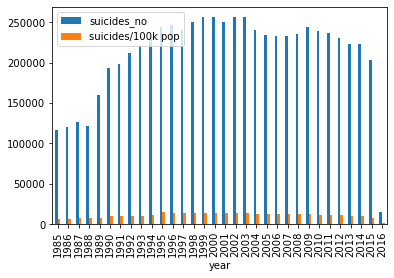

In [81]:
df4 = df.groupby(['year']).sum().reset_index()
df4

df4.plot(x="year", y=["suicides_no", "suicides/100k pop"], kind="bar")
#year doesn't seem to have an impact

In [53]:
df4 = df.groupby(['sex']).mean()
df4
#male is much higher

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
sex,,,,,,
female,2001.258375,112.114306,1.888769e+06,5.392866,0.776601,16866.464414
male,2001.258375,373.034508,1.800818e+06,20.239329,0.776601,16866.464414
